In [14]:
import numpy as np
import pandas as pd

# Graficos
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df_train = pd.read_parquet('./dataset/train.parq')

In [3]:
df_train.head()

,attack_time,watcher_country,watcher_as_num,watcher_as_name,attacker_country,attacker_as_num,attacker_as_name,attack_type,watcher_uuid_enum,attacker_ip_enum,label
0,2023-07-31 07:17:51+00:00,DE,34011.0,Host Europe GmbH,TR,47721.0,Murat Aktas,http:exploit,0,6466,0
1,2023-07-31 07:17:51+00:00,DE,34011.0,Host Europe GmbH,TR,47721.0,Murat Aktas,http:spam,0,6466,0
2,2023-07-31 07:17:49+00:00,DE,20886.0,bn:t Blatzheim Networks Telecom GmbH,DE,51167.0,Contabo GmbH,http:bruteforce,2,4637,0
3,2023-07-31 07:17:49+00:00,DE,20886.0,bn:t Blatzheim Networks Telecom GmbH,DE,51167.0,Contabo GmbH,http:spam,2,4637,0
4,2023-07-31 07:17:49+00:00,DE,20886.0,bn:t Blatzheim Networks Telecom GmbH,DE,51167.0,Contabo GmbH,http:exploit,2,4637,0


In [4]:
df_train[df_train["attacker_ip_enum"] == 0].head()

,attack_time,watcher_country,watcher_as_num,watcher_as_name,attacker_country,attacker_as_num,attacker_as_name,attack_type,watcher_uuid_enum,attacker_ip_enum,label
2381587,2023-08-11 20:10:31+00:00,BR,7162.0,Universo Online S.A.,US,14618.0,AMAZON-AES,http:spam,12087,0,0
2381588,2023-08-11 20:10:31+00:00,BR,7162.0,Universo Online S.A.,US,14618.0,AMAZON-AES,http:scan,12087,0,0
2381658,2023-08-11 20:11:54+00:00,KE,37109.0,MyISP,US,14618.0,AMAZON-AES,http:spam,7432,0,0
2381659,2023-08-11 20:11:54+00:00,KE,37109.0,MyISP,US,14618.0,AMAZON-AES,http:scan,7432,0,0
2653735,2023-08-11 22:16:42+00:00,FI,24940.0,Hetzner Online GmbH,US,14618.0,AMAZON-AES,http:spam,18525,0,0


In [5]:
df_train[df_train["watcher_as_num"] == 14618.0].head()

,attack_time,watcher_country,watcher_as_num,watcher_as_name,attacker_country,attacker_as_num,attacker_as_name,attack_type,watcher_uuid_enum,attacker_ip_enum,label
974,2023-07-31 14:19:29+00:00,US,14618.0,AMAZON-AES,TR,47721.0,Murat Aktas,http:exploit,46,6466,0
977,2023-07-31 14:19:29+00:00,US,14618.0,AMAZON-AES,TR,47721.0,Murat Aktas,http:spam,46,6466,0
979,2023-07-31 14:19:29+00:00,US,14618.0,AMAZON-AES,TR,47721.0,Murat Aktas,http:exploit,46,6466,0
2581,2023-08-01 09:51:29+00:00,US,14618.0,AMAZON-AES,US,55286.0,SERVER-MANIA,http:scan,163,5231,1
2582,2023-08-01 09:51:29+00:00,US,14618.0,AMAZON-AES,US,55286.0,SERVER-MANIA,http:spam,163,5231,1


In [6]:
cols_to_impute = ["watcher_country", "watcher_as_name"]
df_train[cols_to_impute] = df_train.groupby("watcher_uuid_enum")[cols_to_impute].transform(lambda x: x.ffill().bfill())

In [7]:
# Catidad de valores nulos por columna mayores a cero
df_train.isnull().sum()[df_train.isnull().sum() > 0]

watcher_country     212554
watcher_as_name     212573
attacker_country     73661
attacker_as_num        462
attacker_as_name     49512
dtype: int64

In [8]:
a = df_train[df_train["attacker_as_num"] == 51167.0]

In [9]:
# Catidad de valores nulos por columna mayores a cero
a.isnull().sum()[a.isnull().sum() > 0]


watcher_country    3317
watcher_as_name    3317
dtype: int64

In [10]:
# Buscamos los valores nulos en la columna "watcher_as_name"
df_train[df_train["attacker_as_name"].isnull()].head()

,attack_time,watcher_country,watcher_as_num,watcher_as_name,attacker_country,attacker_as_num,attacker_as_name,attack_type,watcher_uuid_enum,attacker_ip_enum,label
87429,2023-08-01 15:11:41+00:00,US,7922.0,COMCAST-7922,US,0.0,NaN,http:spam,4432,9764,0
87430,2023-08-01 15:11:41+00:00,US,7922.0,COMCAST-7922,US,0.0,NaN,http:scan,4432,9764,0
108720,2023-08-22 00:09:33+00:00,US,398101.0,GO-DADDY-COM-LLC,DE,0.0,NaN,http:spam,5538,8235,0
108721,2023-08-22 00:09:33+00:00,US,398101.0,GO-DADDY-COM-LLC,DE,0.0,NaN,http:scan,5538,8235,0
120857,2023-07-31 20:41:59+00:00,GB,33182.0,DIMENOC,BR,0.0,NaN,http:bruteforce,6136,2735,0


---

In [11]:
cols_to_impute = ["watcher_country", "watcher_as_name"]
df_train[cols_to_impute] = df_train.groupby("attacker_ip_enum")[cols_to_impute].transform(lambda x: x.ffill().bfill())

---

In [12]:
df_train["attacker_as_name"].value_counts()

attacker_as_name
DIGITALOCEAN-ASN                                    5250039
MICROSOFT-CORP-MSN-AS-BLOCK                         4373283
OVH SAS                                             2898382
Hetzner Online GmbH                                 1719527
GOOGLE-CLOUD-PLATFORM                               1711559
                                                     ...   
F-NET sp. z o.o.                                          1
CITYNET Sp.z o.o.                                         1
Digiana Speed Net Private Limited                         1
Internet Maekhong Network Company Limited                 1
ASSOCIACAO NACIONAL PARA INCLUSAO DIGITAL - ANID          1
Name: count, Length: 8023, dtype: int64

# Analisis Exploratorio de Datos

In [41]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61629685 entries, 0 to 61629684
Data columns (total 11 columns):
 #   Column             Dtype              
---  ------             -----              
 0   attack_time        datetime64[us, UTC]
 1   watcher_country    category           
 2   watcher_as_num     float32            
 3   watcher_as_name    category           
 4   attacker_country   category           
 5   attacker_as_num    float32            
 6   attacker_as_name   category           
 7   attack_type        category           
 8   watcher_uuid_enum  int32              
 9   attacker_ip_enum   int32              
 10  label              int8               
dtypes: category(5), datetime64[us, UTC](1), float32(2), int32(2), int8(1)
memory usage: 2.0 GB


In [42]:
# Catidad de valores nulos por columna mayores a cero
df_train.isnull().sum()[df_train.isnull().sum() > 0]


watcher_country     10232
watcher_as_name     10232
attacker_country    73661
attacker_as_num       462
attacker_as_name    49512
dtype: int64

In [43]:
# mostramos las filas nan de "attacker_as_num" 
ferk = df_train[df_train["attacker_as_num"].isnull()]

In [44]:
# Catidad de valores únicos en la columna 'wacher_contry'
a = df_train['watcher_country'].value_counts()

In [45]:
# cantidad de valores únicos en la columna 'watcher_as_name'
b = df_train['watcher_as_name'].value_counts()

In [46]:
# cantidad de valores únicos en la columna 'attacker_country'
c = df_train['attacker_country'].value_counts()

In [47]:
# cantidad de valores únicos en la columna 'attacker_as_name'
d = df_train['attacker_as_name'].value_counts()

In [48]:
# Cantida de valores únicos en la columna 'attack_type'
e = df_train['attack_type'].value_counts()

In [49]:
# Eliminar duplicados
df_train.drop_duplicates(inplace=True)

# Entendimiento de los datos

C:\Users\lufer\AppData\Local\Temp\ipykernel_25548\3697860808.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette="Set3")


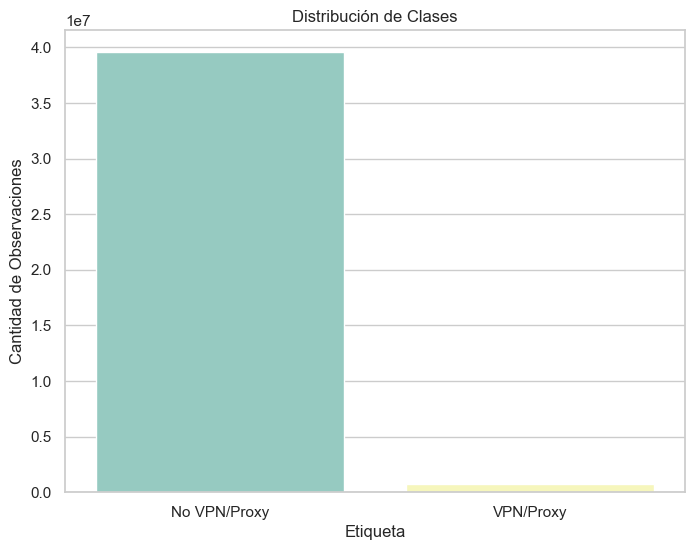

In [50]:
class_counts = df_train['label'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
sns.barplot(x=class_counts.index, y=class_counts.values, palette="Set3")

# Personalizar el gráfico
plt.title("Distribución de Clases")
plt.xlabel("Etiqueta")
plt.ylabel("Cantidad de Observaciones")
plt.xticks([0, 1], ["No VPN/Proxy", "VPN/Proxy"])

# Mostrar el gráfico
plt.show()

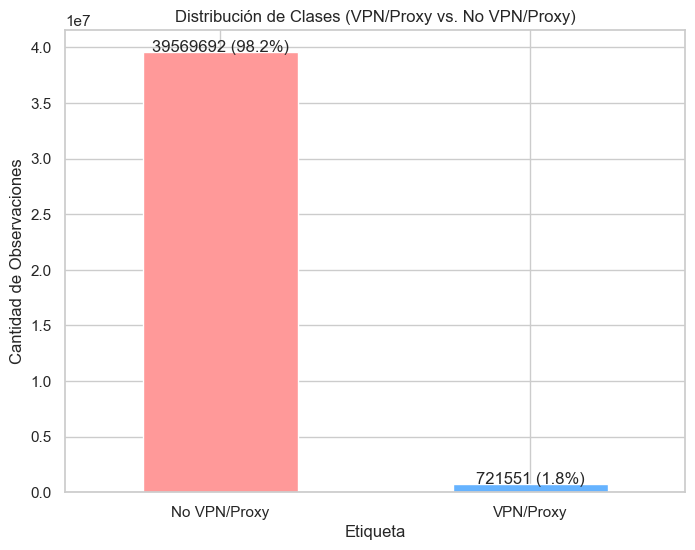

In [51]:
class_counts = df_train['label'].value_counts()

# Crear un gráfico de barras apiladas con colores atractivos
fig, ax = plt.subplots(figsize=(8, 6))

# Definir colores para las clases
colors = ['#ff9999', '#66b3ff']

# Crear el gráfico de barras apiladas
class_counts.plot(kind='bar', ax=ax, color=colors, width=0.5)

# Personalizar el gráfico
ax.set_title("Distribución de Clases (VPN/Proxy vs. No VPN/Proxy)")
ax.set_xlabel("Etiqueta")
ax.set_ylabel("Cantidad de Observaciones")
ax.set_xticklabels(["No VPN/Proxy", "VPN/Proxy"], rotation=0)

# Agregar porcentajes en las barras
total = class_counts.sum()
for i, count in enumerate(class_counts):
    ax.text(i, count + 500, f'{count} ({count/total*100:.1f}%)', ha='center')

plt.show()

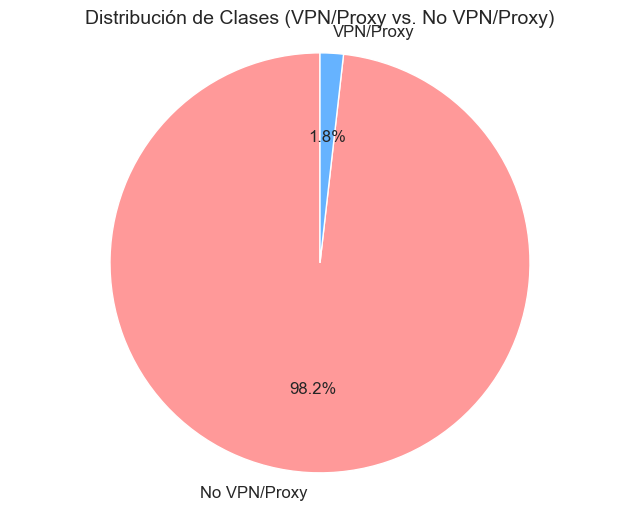

In [52]:
class_counts = df_train['label'].value_counts()

# Crear un gráfico circular (pie chart) con colores atractivos
colors = ['#ff9999', '#66b3ff']
labels = ['No VPN/Proxy', 'VPN/Proxy']
sizes = class_counts.values

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, textprops={'fontsize': 12})

# Personalizar el gráfico
plt.title("Distribución de Clases (VPN/Proxy vs. No VPN/Proxy)", fontsize=14)

plt.axis('equal')  # Esto asegura que el gráfico sea un círculo en lugar de una elipse

plt.show()

C:\Users\lufer\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128683 (\N{NO ENTRY SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\lufer\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128274 (\N{LOCK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


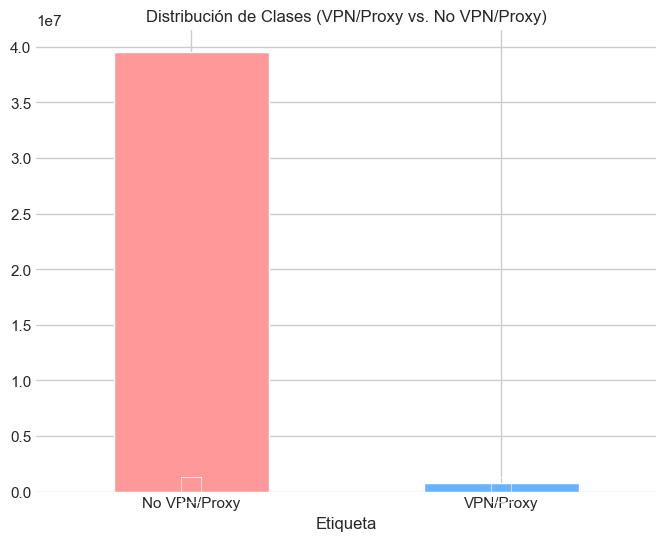

In [53]:

# Supongamos que tienes un DataFrame llamado 'data' que contiene tus datos
# Puedes contar las ocurrencias de cada clase en la columna 'label'
class_counts = df_train['label'].value_counts()

# Crear un gráfico de barras apiladas con colores atractivos y elementos gráficos
fig, ax = plt.subplots(figsize=(8, 6))

# Definir colores para las clases
colors = ['#ff9999', '#66b3ff']

# Crear el gráfico de barras apiladas
class_counts.plot(kind='bar', ax=ax, color=colors, width=0.5)

# Agregar iconos para representar las clases
plt.annotate('🚫', xy=(0, 0), fontsize=30, color='white', va='center', ha='center')
plt.annotate('🔒', xy=(1, 0), fontsize=30, color='white', va='center', ha='center')

# Personalizar el gráfico
ax.set_title("Distribución de Clases (VPN/Proxy vs. No VPN/Proxy)")
ax.set_xlabel("Etiqueta")
ax.set_xticklabels(["No VPN/Proxy", "VPN/Proxy"], rotation=0)

# Quitar los ejes
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Quitar los ticks
ax.tick_params(axis='both', which='both', length=0)

plt.show()

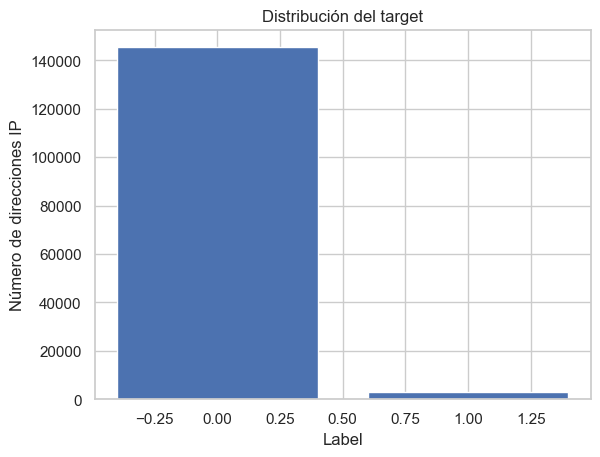

In [54]:

# Calcular la distribución del target
df_target = df_train.groupby("label")["attacker_ip_enum"].nunique()

# Crear el gráfico
plt.bar(df_target.index, df_target.values)
plt.xlabel("Label")
plt.ylabel("Número de direcciones IP")
plt.title("Distribución del target")
plt.show()

# fghf

<Axes: xlabel='date'>

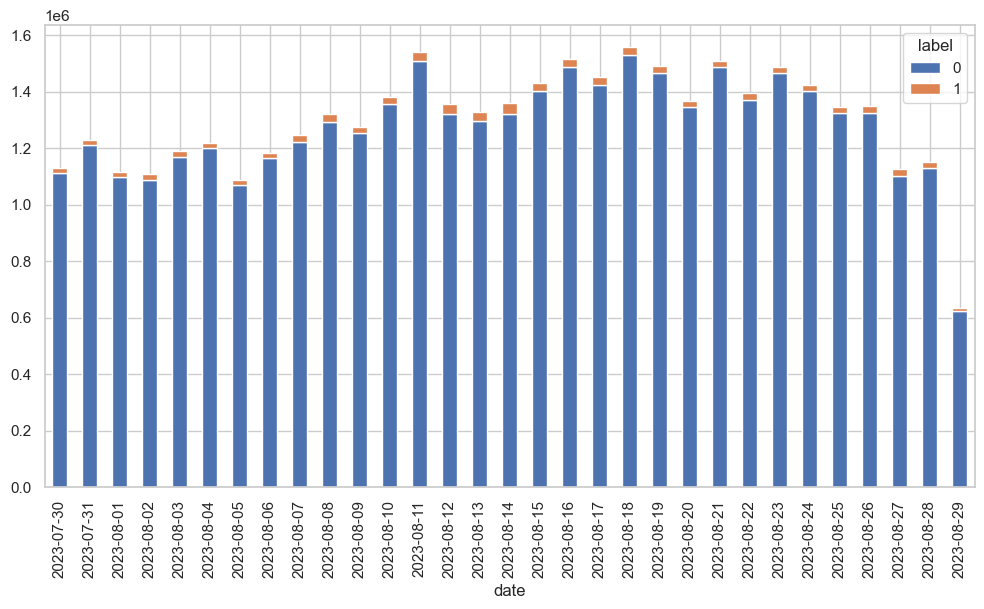

In [55]:
# Agrupamos por dia, sin cosiderar la hora y el año, y vemos la cantidad de ataques por dia separando por tipo de vpn/proxy o no
df_train['date'] = df_train['attack_time'].dt.date

df_train.groupby(['date', 'label']).size().unstack().plot(kind='bar', stacked=True, figsize=(12, 6))

In [56]:
df_train['date'] = df_train['attack_time'].dt.date

a = df_train.groupby(['date', 'label']).size().unstack()
a.head()

label,0,1
date,,
2023-07-30,1111529,16625
2023-07-31,1210343,17788
2023-08-01,1098910,17368
2023-08-02,1087028,21136
2023-08-03,1169585,18629


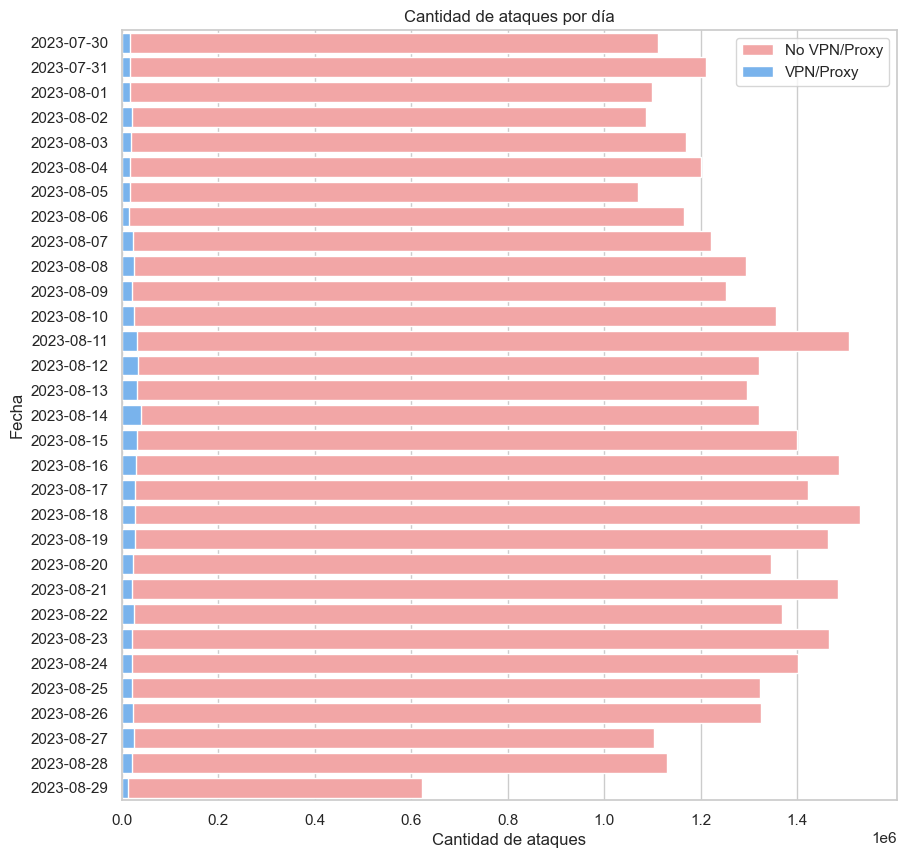

In [57]:
plt.figure(figsize=(10, 10))
sns.set(style="whitegrid")

sns.barplot(x=a[0], y=a.index, color='#ff9999', label='No VPN/Proxy')
sns.barplot(x=a[1], y=a.index, color='#66b3ff', label='VPN/Proxy')

plt.title("Cantidad de ataques por día")
plt.xlabel("Cantidad de ataques")
plt.ylabel("Fecha")
plt.legend()

#justamos el eje x para que se vea mejor
plt.xticks(np.arange(0, 1.6E6, 0.2E6))


plt.show()


In [58]:
# cantidad de filas duplicadas en df_train
df_train.duplicated().sum()

0

C:\Users\lufer\AppData\Local\Temp\ipykernel_25548\1990867518.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df_train['label'], y=df_train['attacker_ip_enum'], palette="Set3")


<Axes: xlabel='label', ylabel='attacker_ip_enum'>

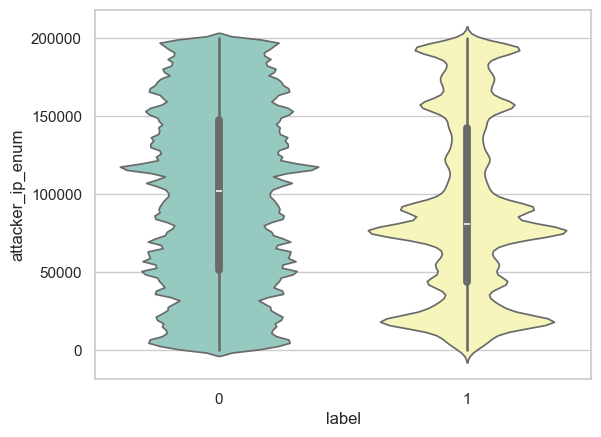

In [59]:
sns.violinplot(x=df_train['label'], y=df_train['attacker_ip_enum'], palette="Set3")

C:\Users\lufer\AppData\Local\Temp\ipykernel_25548\3196820913.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_train, x='label', y='watcher_as_num', palette="Set3")


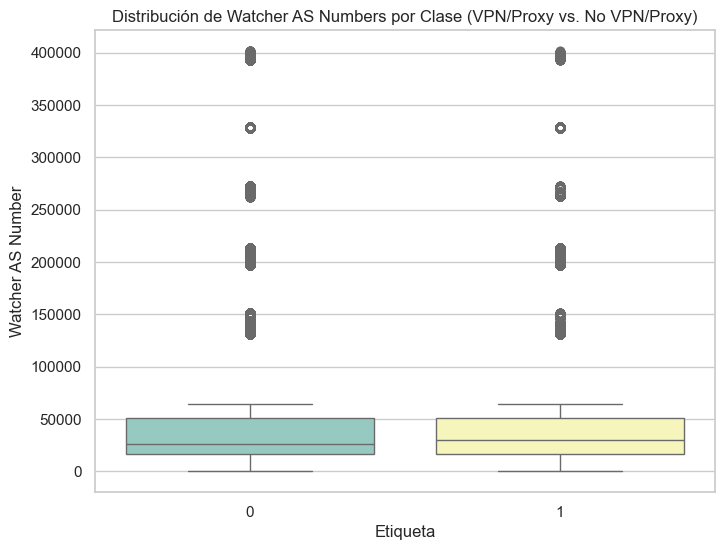

In [60]:
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")

sns.boxplot(data=df_train, x='label', y='watcher_as_num', palette="Set3")

plt.title("Distribución de Watcher AS Numbers por Clase (VPN/Proxy vs. No VPN/Proxy)")
plt.xlabel("Etiqueta")
plt.ylabel("Watcher AS Number")

plt.show()

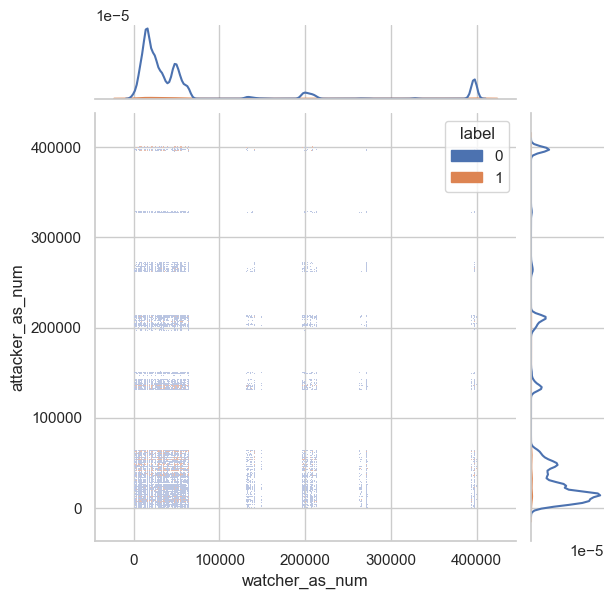

In [61]:
# Selecciona dos variables numéricas para el análisis
variable1 = 'watcher_as_num'
variable2 = 'attacker_as_num'

# Crea un gráfico 2D con distribución marginal
g = sns.JointGrid(data=df_train, x=variable1, y=variable2, hue="label")
g = g.plot(sns.histplot, sns.kdeplot)
g = g.set_axis_labels(xlabel=variable1, ylabel=variable2)

plt.show()

In [62]:
# Cargamos el dataset de shodan_df_hashed.csv
df_shodan = pd.read_csv('./dataset/shodan_df_hashed.csv')

In [63]:
df_shodan.head()

,shodan_info,attacker_ip_enum
0,{},5915
1,"{'22/tcp': {'headers_hash': None, 'jarm': None...",3325
2,{},8416
3,{},1213
4,{},9185


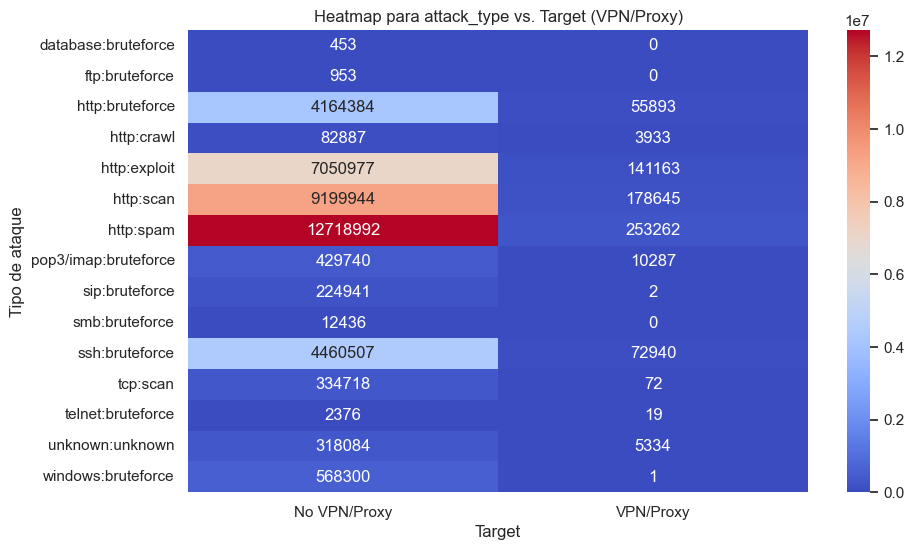

In [64]:
plt.figure(figsize=(10, 6))
ax = sns.heatmap(pd.crosstab(df_train["attack_type"], df_train['label']), annot=True, cmap='coolwarm', fmt='d')
plt.title('Heatmap para attack_type vs. Target (VPN/Proxy)')
plt.xlabel('Target')
plt.ylabel('Tipo de ataque')

ax.set_xticklabels(['No VPN/Proxy', 'VPN/Proxy'])

plt.show()

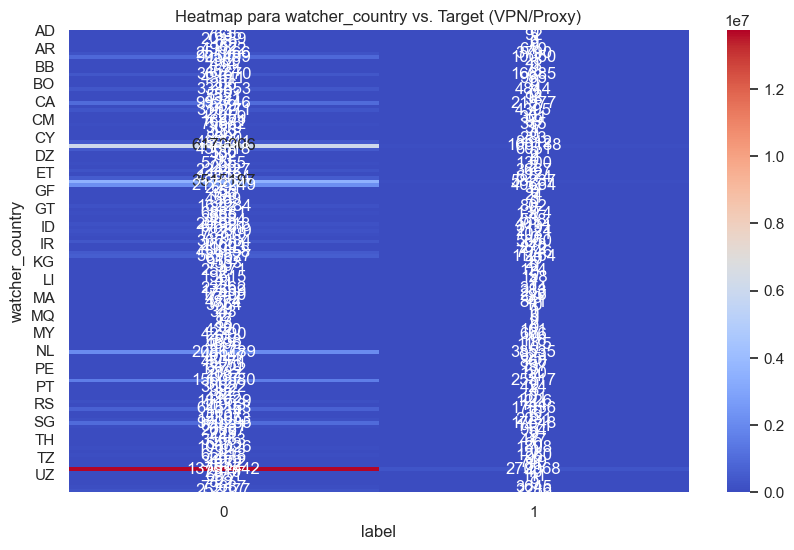

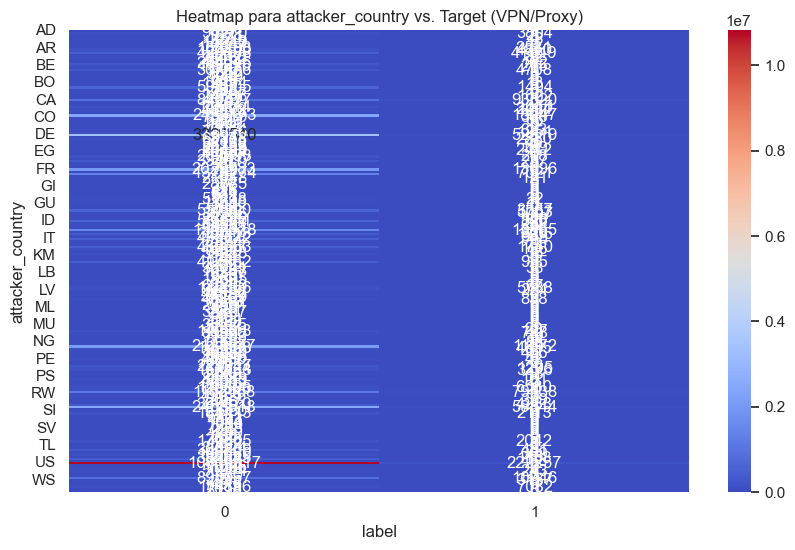

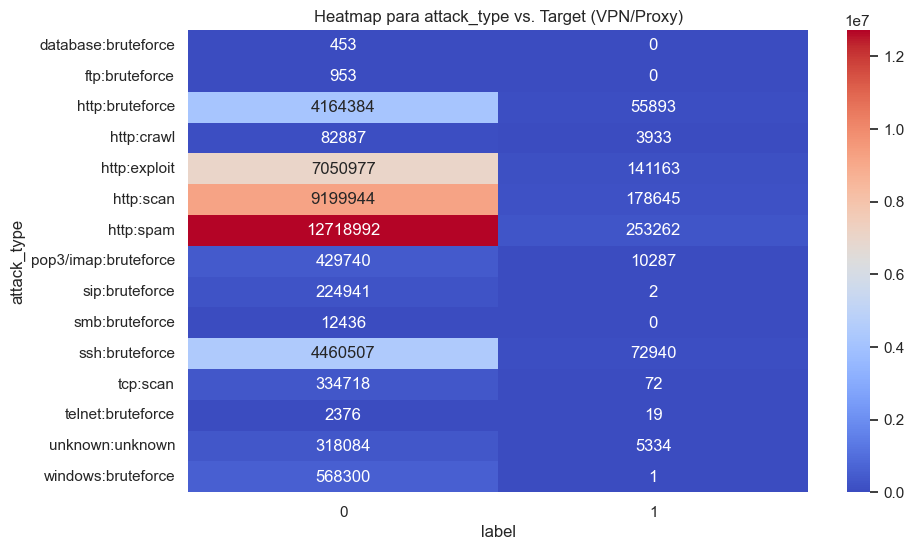

In [65]:
# Seleccionar un subconjunto de columnas categóricas relevantes
categorical_columns = ['watcher_country', 'attacker_country', 'attack_type']

# Crear heatmaps para cada grupo de columnas categóricas
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.heatmap(pd.crosstab(df_train[column], df_train['label']), annot=True, cmap='coolwarm', fmt='d')
    plt.title(f'Heatmap para {column} vs. Target (VPN/Proxy)')
    plt.show()

In [66]:
df_train['fecha'] = df_train['attack_time'].dt.date  # Extraer solo la fecha

In [67]:
# Agrupación de datos por tipo de ataque, fecha y target
attack_type_date_target = df_train.groupby([ 'fecha', 'label', 'attack_type']).size().unstack().fillna(0)


C:\Users\lufer\AppData\Local\Temp\ipykernel_25548\2809903166.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  attack_type_date_target = df_train.groupby([ 'fecha', 'label', 'attack_type']).size().unstack().fillna(0)


In [68]:
attack_type_date_target

attack_type       database:bruteforce  ftp:bruteforce  http:bruteforce  \
fecha      label                                                         
2023-07-30 0                       13              24           137169   
           1                        0               0             1879   
2023-07-31 0                       37              48           133418   
           1                        0               0             1890   
2023-08-01 0                       34              75           131682   
...                               ...             ...              ...   
2023-08-27 1                        0               0             2282   
2023-08-28 0                        2              18            93549   
           1                        0               0             1007   
2023-08-29 0                        0               6            59130   
           1                        0               0             1342   

attack_type       http:crawl  http:exploit  http:scan  http:spam  \
fecha      label                                                   
2023-07-30 0            1774        219370     236939     364906   
           1             113          4053       3658       6833   
2023-07-31 0            3243        240514     271590     409755   
           1             148          4622       3657       7274   
2023-08-01 0            3950        197351     263452     360544   
...                      ...           ...        ...        ...   
2023-08-27 1              36          4788       6481       8382   
2023-08-28 0            3281        191016     294891     372746   
           1              62          2825       7485       6269   
2023-08-29 0            2046        109469     148783     203041   
           1              32          2473       3513       4602   

attack_type       pop3/imap:bruteforce  sip:bruteforce  smb:bruteforce  \
fecha      label                                                         
2023-07-30 0                     14752             279             182   
           1                         3               0               0   
2023-07-31 0                     17579             343             343   
           1                       128               0               0   
2023-08-01 0                     14740            8908             341   
...                                ...             ...             ...   
2023-08-27 1                         7               0               0   
2023-08-28 0                      9599            2577             457   
           1                        16               0               0   
2023-08-29 0                      5011            1276             260   
           1                        45               0               0   

attack_type       ssh:bruteforce  tcp:scan  telnet:bruteforce  \
fecha      label                                                
2023-07-30 0               92480      9200                 19   
           1                  23        12                  0   
2023-07-31 0               88764     12420                 47   
           1                   7         0                  0   
2023-08-01 0               75380     13831                240   
...                          ...       ...                ...   
2023-08-27 1                2558         1                  3   
2023-08-28 0              125928      7778                 99   
           1                2193         1                  2   
2023-08-29 0               72993      2596                 49   
           1                 605         2                  0   

attack_type       unknown:unknown  windows:bruteforce  
fecha      label                                       
2023-07-30 0                 7734               26688  
           1                   51                   0  
2023-07-31 0                 9429               22813  
           1                   62                   0  
2023-08

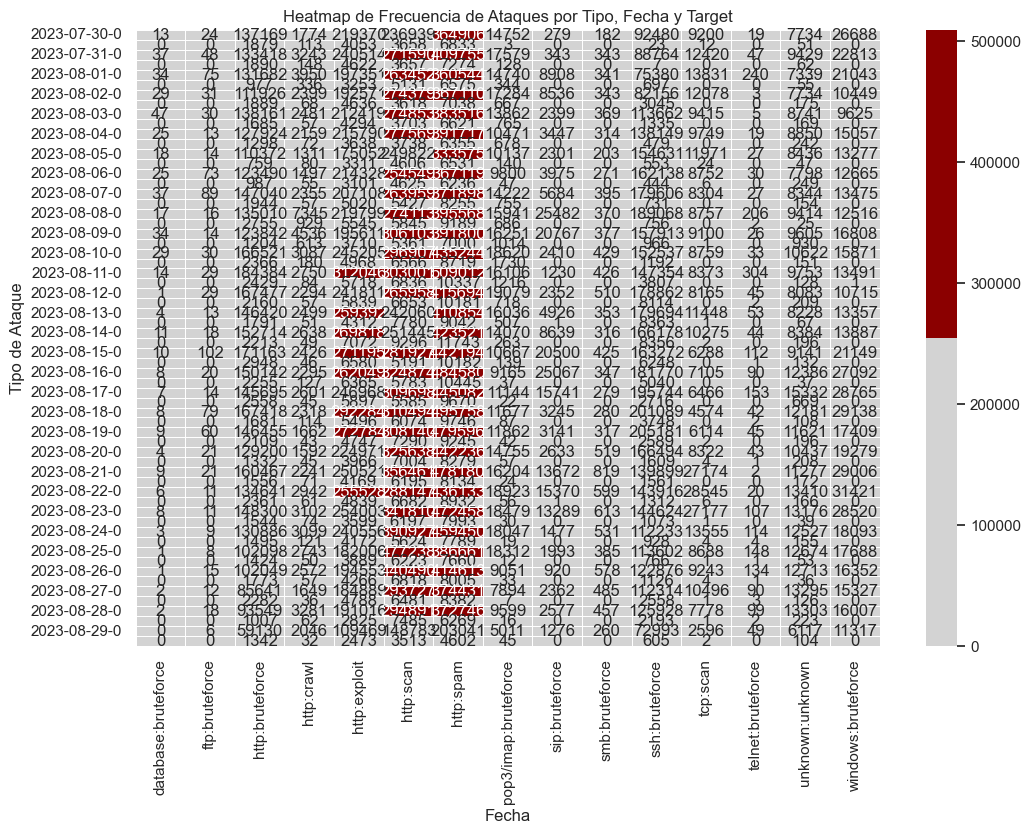

In [69]:
plt.figure(figsize=(12, 8))
cmap = sns.color_palette(['lightgray', 'darkred'])
ax = sns.heatmap(attack_type_date_target, cmap=cmap, annot=True, fmt='g', linewidths=.5)
plt.title('Heatmap de Frecuencia de Ataques por Tipo, Fecha y Target')
plt.xlabel('Fecha')
plt.ylabel('Tipo de Ataque')
#ax.set_yticklabels(['No VPN/Proxy', 'VPN/Proxy'])
plt.show()

# Features Ingeniering (Ingeniería de características)

In [13]:
df_train.head()

,attack_time,watcher_country,watcher_as_num,watcher_as_name,attacker_country,attacker_as_num,attacker_as_name,attack_type,watcher_uuid_enum,attacker_ip_enum,label
0,2023-07-31 07:17:51+00:00,DE,34011.0,Host Europe GmbH,TR,47721.0,Murat Aktas,http:exploit,0,6466,0
1,2023-07-31 07:17:51+00:00,DE,34011.0,Host Europe GmbH,TR,47721.0,Murat Aktas,http:spam,0,6466,0
2,2023-07-31 07:17:49+00:00,DE,20886.0,bn:t Blatzheim Networks Telecom GmbH,DE,51167.0,Contabo GmbH,http:bruteforce,2,4637,0
3,2023-07-31 07:17:49+00:00,DE,20886.0,bn:t Blatzheim Networks Telecom GmbH,DE,51167.0,Contabo GmbH,http:spam,2,4637,0
4,2023-07-31 07:17:49+00:00,DE,20886.0,bn:t Blatzheim Networks Telecom GmbH,DE,51167.0,Contabo GmbH,http:exploit,2,4637,0


In [71]:
# Agregamos columna con el attack_month, attack_day, attack_hour
df_train['attack_month'] = df_train['attack_time'].dt.month
df_train['attack_day'] = df_train['attack_time'].dt.day
df_train['attack_hour'] = df_train['attack_time'].dt.hour

In [72]:
# Calcular la frecuencia de ataques por atacante
df_train["attack_frequency"] = df_train.groupby("attacker_ip_enum")["label"].transform("size")

In [73]:
# Filtramos por un dia 2023-07-31
fer = df_train["date"][0]
df_train_2023_07_31 = df_train[df_train["date"] == fer]


In [74]:
# Cargar el dataframe con datos de Shodan
df_shodan = pd.read_csv('./dataset/shodan_df_hashed.csv')
df_shodan.head()

,shodan_info,attacker_ip_enum
0,{},5915
1,"{'22/tcp': {'headers_hash': None, 'jarm': None...",3325
2,{},8416
3,{},1213
4,{},9185


In [75]:
fer = df_shodan["shodan_info"][0]
fer


'{}'

In [76]:
# Contar puertos abiertos
def count_ports(row):
    ports = row['shodan_info']
    if ports == {}:
        return 0
    return len(ports)

df_shodan['open_ports'] = df_shodan.apply(count_ports, axis=1) 

# Buscar puertos específicos
df_train['port_22'] = df_shodan['shodan_info'].str.contains('22/tcp').astype(int)
df_train['port_80'] = df_shodan['shodan_info'].str.contains('80/tcp').astype(int)


In [ ]:
# Calulos el promedio de ataques por hora por cada dia con df_train
df_train.groupby(['date'])[["hour"]].mean()

In [ ]:
df_train.head()

,attack_time,watcher_country,watcher_as_num,watcher_as_name,attacker_country,attacker_as_num,attacker_as_name,attack_type,watcher_uuid_enum,attacker_ip_enum,label,attack_month,attack_day,attack_hour,attack_frequency,port_22,port_80
0,2023-07-31 07:17:51+00:00,DE,34011.0,Host Europe GmbH,TR,47721.0,Murat Aktas,http:exploit,0,6466,0,7,31,7,121012,0.0,0.0
1,2023-07-31 07:17:51+00:00,DE,34011.0,Host Europe GmbH,TR,47721.0,Murat Aktas,http:spam,0,6466,0,7,31,7,121012,1.0,0.0
2,2023-07-31 07:17:49+00:00,DE,20886.0,bn:t Blatzheim Networks Telecom GmbH,DE,51167.0,Contabo GmbH,http:bruteforce,2,4637,0,7,31,7,67441,0.0,0.0
3,2023-07-31 07:17:49+00:00,DE,20886.0,bn:t Blatzheim Networks Telecom GmbH,DE,51167.0,Contabo GmbH,http:spam,2,4637,0,7,31,7,67441,0.0,0.0
4,2023-07-31 07:17:49+00:00,DE,20886.0,bn:t Blatzheim Networks Telecom GmbH,DE,51167.0,Contabo GmbH,http:exploit,2,4637,0,7,31,7,67441,0.0,0.0


In [79]:
# Imputamos los valores nulos de la columna 'attacker_as_num' con el valor 0
df_train['attacker_as_num'].fillna(0, inplace=True)


In [82]:
# Medelamos un perceptron
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Seleccionamos las columnas que vamos a usar para entrenar el modelo
X = df_train[['watcher_as_num', 'attacker_as_num', 'attacker_ip_enum', 'attack_frequency']]
y = df_train['label']

# Dividimos el dataset en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123, stratify=y)

# Estandarizamos los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Creamos el modelo
model = Perceptron()

# Entrenamos el modelo
model.fit(X_train, y_train)

# Predecimos con el modelo
y_pred = model.predict(X_test)

# Calculamos la exactitud
acc = accuracy_score(y_test, y_pred)
print(f'Exactitud: {acc:.2f}')

Exactitud: 0.98


In [83]:
from sklearn.metrics import f1_score

# Calculamos el f1-score
f1 = f1_score(y_test, y_pred)

# Imprimimos el resultado

print("El f1-score es: ", f1)

El f1-score es:  0.0
